In [14]:
%pip install pandas matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import json
from pathlib import Path

rows = []

for metrics_file in Path("results").rglob("metrics.json"):
    with open(metrics_file, "r", encoding="utf-8") as f:
        data = json.load(f)

    # extract metadata from path
    parts = metrics_file.parts
    # e.g. results / MODEL / PROMPT / metrics.json
    model = parts[-3]
    prompt = parts[-2]

    data["model_folder"] = model
    data["prompt_folder"] = prompt
    data["path"] = str(metrics_file)

    rows.append(data)

df = pd.DataFrame(rows)

print(df.head())


                                    model                prompt  num_tests  \
0  meta-llama/llama-3.3-70b-instruct:free      FewShotViolFails        100   
1  meta-llama/llama-3.3-70b-instruct:free  FewShotViolSuccesses        100   
2  meta-llama/llama-3.3-70b-instruct:free      ZeroShotTraining        100   
3  meta-llama/llama-3.3-70b-instruct:free              ZeroShot        100   

   batch_size  accuracy  violation_precision  non_violation_precision  \
0          20  0.910000             0.895833                 0.923077   
1          20  0.868687             0.883721                 0.857143   
2          20  0.870000             0.864865                 0.873016   
3          20  0.860000             0.923077                 0.819672   

   violation_recall  non_violation_recall        f1     confusion_matrix  \
0          0.914894              0.905660  0.905263   [[48, 5], [4, 43]]   
1          0.826087              0.905660  0.853933   [[48, 5], [8, 38]]   
2          0.80

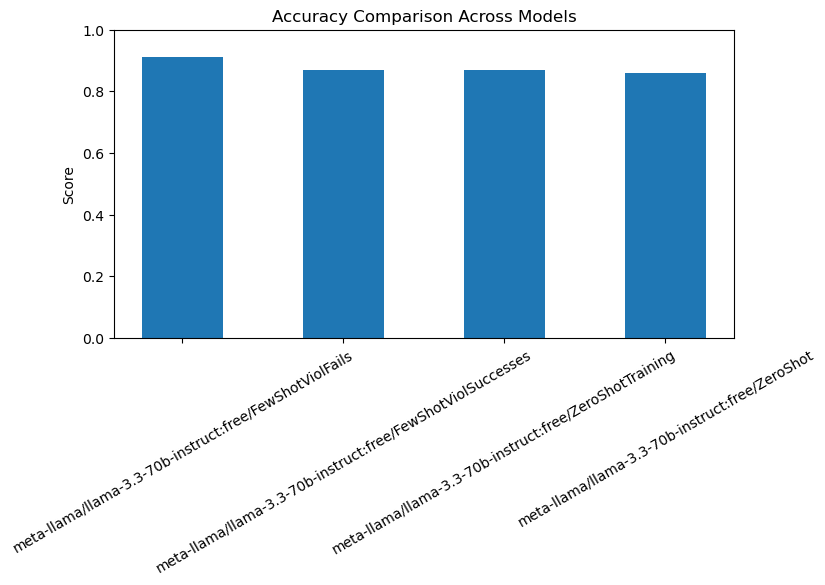

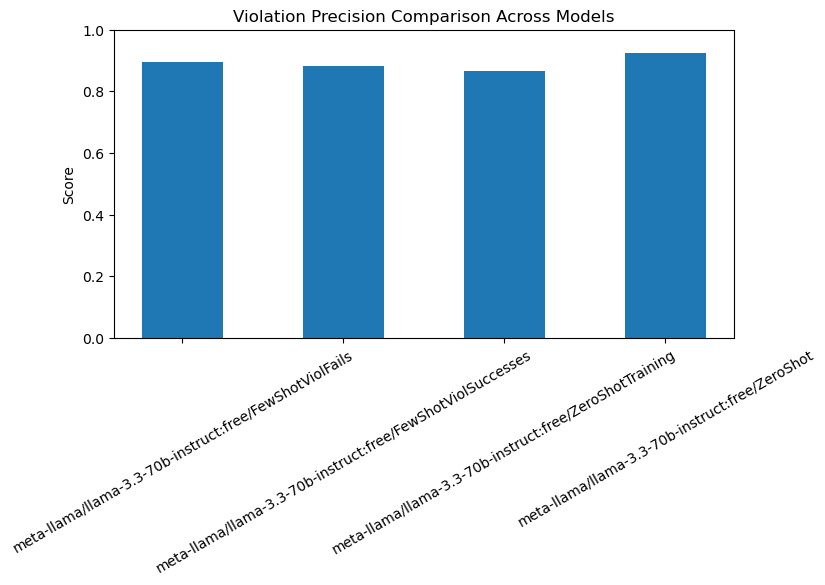

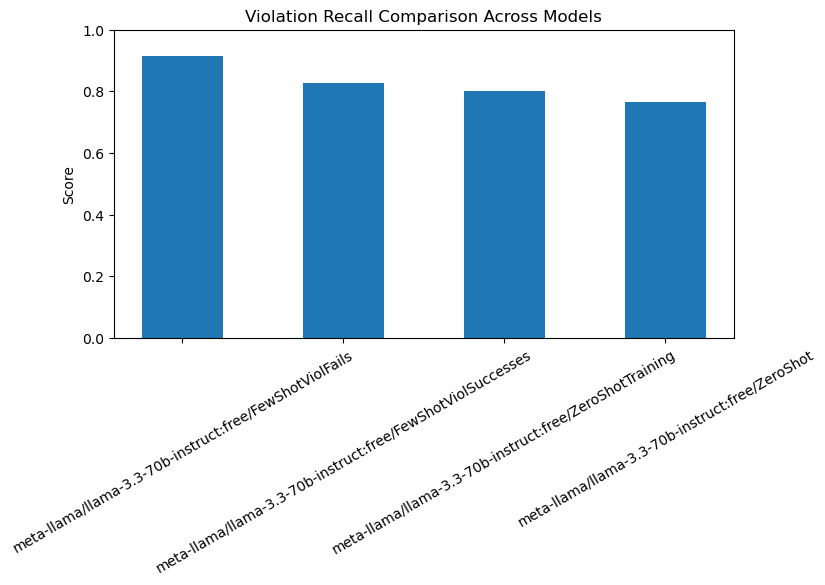

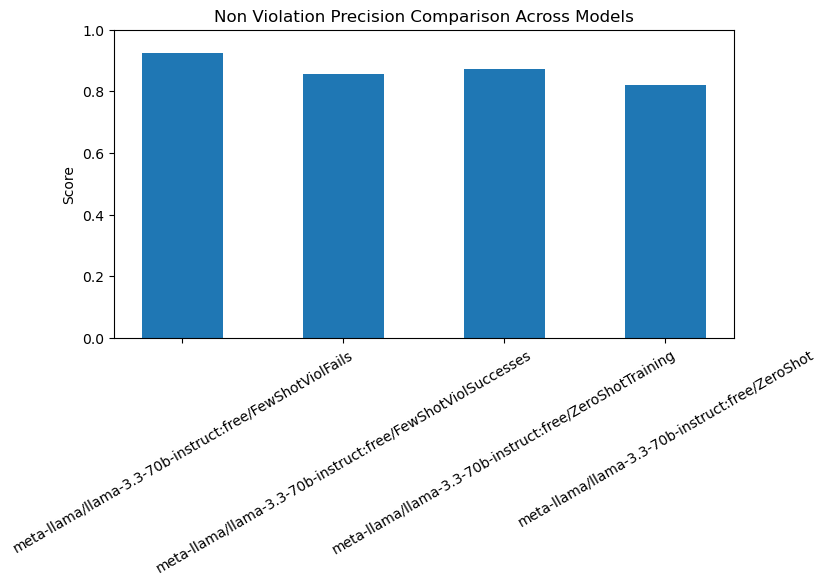

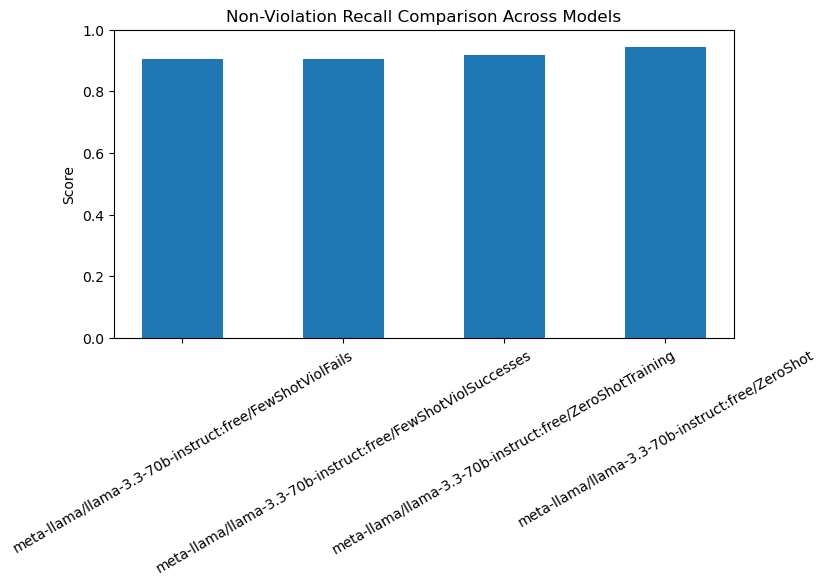

In [16]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ["accuracy", "precision", "recall", "f1"]
x = np.arange(len(df['model']))


plt.figure(figsize=(8,4))
plt.bar(x, df["accuracy"], width=0.5)
plt.xticks(x, df['model'] + "/" + df["prompt"], rotation=30)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("Accuracy Comparison Across Models")
plt.show()

plt.figure(figsize=(8,4))
plt.bar(x, df["violation_precision"], width=0.5)
plt.xticks(x, df['model'] + "/" + df["prompt"], rotation=30)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("Violation Precision Comparison Across Models")
plt.show()

plt.figure(figsize=(8,4))
plt.bar(x, df["violation_recall"], width=0.5)
plt.xticks(x, df['model'] + "/" + df["prompt"], rotation=30)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("Violation Recall Comparison Across Models")
plt.show()

plt.figure(figsize=(8,4))
plt.bar(x, df["non_violation_precision"], width=0.5)
plt.xticks(x, df['model'] + "/" + df["prompt"], rotation=30)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("Non Violation Precision Comparison Across Models")
plt.show()

plt.figure(figsize=(8,4))
plt.bar(x, df["non_violation_recall"], width=0.5)
plt.xticks(x, df['model'] + "/" + df["prompt"], rotation=30)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("Non-Violation Recall Comparison Across Models")
plt.show()